# Neuronales Netzwerk - W6_Saisonbrot
Baisert Basiert auf Kopie von neural_net_estimation_with_dropout.ipynb.

## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [22]:

# Import the necessary libraries
import pandas as pd
import requests
import io

# Define the file paths
subdirectory = "pickle_data//W6_Saisonbrot"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (236, 5)
Loaded Validation features dimensions: (56, 5)
Loaded Test features dimensions: (364, 5)

Loaded Training labels dimensions: (236, 1)
Loaded Validation labels dimensions: (56, 1)
Loaded Test labels dimensions: (364, 1)

First few rows of loaded training features:
   Weihnachtsmarkt_1.0  Temperatur  Friday_1.0  Sonnenschein  Werktag_1.0
0                    0     12.6875           0      0.303030            1
1                    0     11.8875           1      0.030519            1
2                    0     16.7750           0      0.287179            0
3                    0     14.9875           0      0.196281            0
4                    0     10.7750           0      0.052356            1

First few rows of loaded training labels:
      Umsatz
0  41.813038
1  16.410876
2  18.574458
3  24.640084
4  43.515366


In [23]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[ 0.         12.6875      0.          0.3030303   1.        ]
 [ 0.         11.8875      1.          0.03051882  1.        ]
 [ 0.         16.775       0.          0.28717949  0.        ]
 [ 0.         14.9875      0.          0.19628099  0.        ]
 [ 0.         10.775       0.          0.05235602  1.        ]]


## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dropout(.3),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 10 (40.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [25]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=8,
                    validation_data=(validation_features, validation_labels))

Epoch 1/8


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5506.0161 - val_loss: 5276.6807
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5293.2905 - val_loss: 5270.2944
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5912.7197 - val_loss: 5266.1948
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5359.9712 - val_loss: 5262.8237
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5484.0259 - val_loss: 5259.2983
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5400.5215 - val_loss: 5257.3491
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5343.8423 - val_loss: 5254.5820
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5692.3770 - val_loss: 5249.7178


## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [26]:
model.save("python_model_W6_Saisonbrot.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

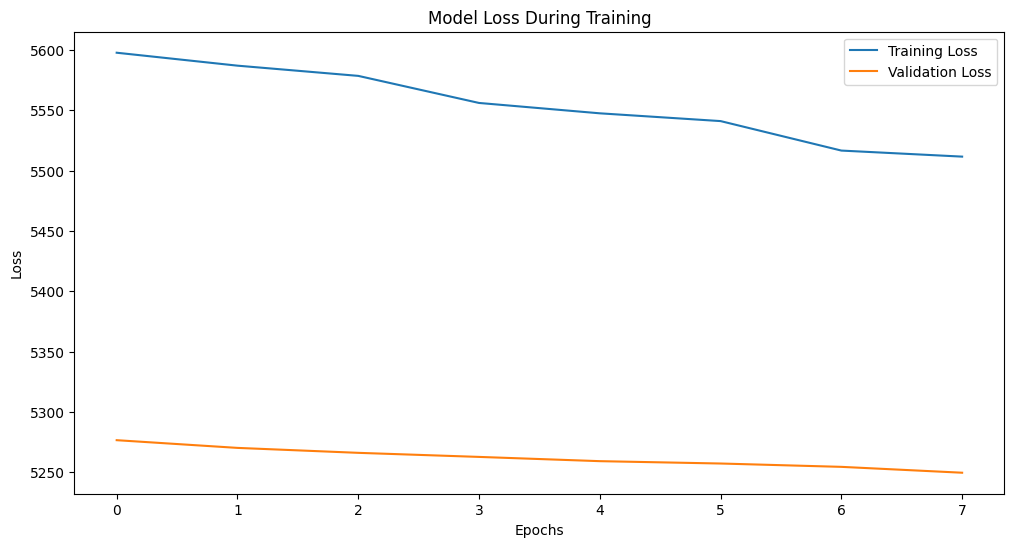

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [28]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAPE on the Training Data: 97.12%
MAPE on the Validation Data: 97.27%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


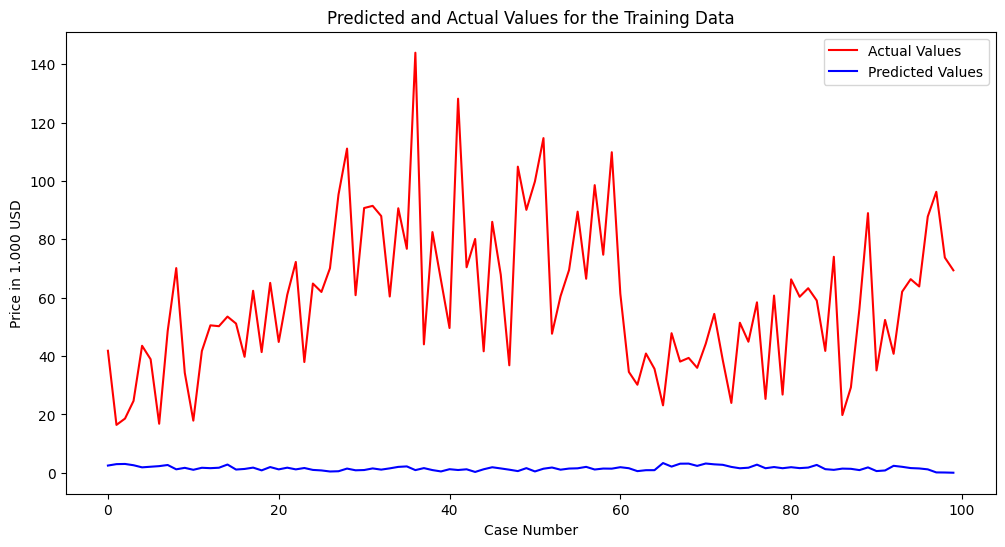

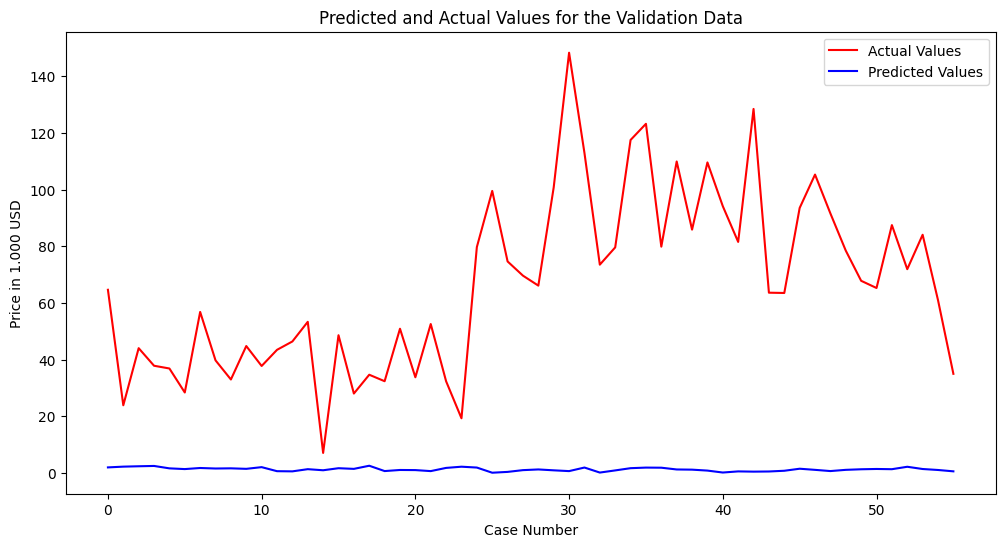

In [29]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')